## **Install Packages**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import seaborn as sns
from scipy import stats
import scipy
from matplotlib.pyplot import figure

## **Data Reading**

In [2]:
df=pd.read_csv('EPL_Soccer_MLR_LR.csv')
df_=df.copy()

## **Viewing Data and Variables**

In [5]:
df.head()

,PlayerName,Club,DistanceCovered(InKms),Goals,MinutestoGoalRatio,ShotsPerGame,AgentCharges,BMI,Cost,PreviousClubCost,Height,Weight,Score
0,"Braund, Mr. Owen Harris",MUN,3.96,7.5,37.5,12.3,60,20.56,109.1,63.32,195.9,78.9,19.75
1,"Allen, Mr. William Henry",MUN,4.41,8.3,38.2,12.7,68,20.67,102.8,58.55,189.7,74.4,21.30
2,"Moran, Mr. James",MUN,4.14,5.0,36.4,11.6,21,21.86,104.6,55.36,177.8,69.1,19.88
3,"McCarthy, Mr. Timothy J",MUN,4.11,5.3,37.3,12.6,69,21.88,126.4,57.18,185.0,74.9,23.66
4,"Palsson, Master. Gosta Leonard",MUN,4.45,6.8,41.5,14.0,29,18.96,80.3,53.20,184.6,64.6,17.64


## **Data Dictionary**

* PlayerName : Player Name

* Club : Club of the player
  1. MUN:Manchester United F.C.
  2. CHE: Chelsea F.C.
  3. LIV: Liverpool F.C.

* DistanceCovered(InKms): Average Kms distance covered by the player in each game

* Goals: Average Goals per match

* MinutestoGoalRatio: Minutes 

* ShotsPerGame: Average shots taken per game

* AgentCharges: Agent Fees in h

* BMI: Body-Mass index

* Cost: Cost of each player in hundread thousand dollars

* PreviousClubCost: Previous club cost in hundread thousand dollars

* Height: Height of player in cm

* Weight: Weight of player in kg

* Score: Average score per match


## **Exploratory Data Analysis**
Exploratory Data Analysis, commonly known as EDA, is a technique to analyze the data with visuals. It involves using statistics and visual techniques to identify particular trends in data. 
 
It is used to understand data patterns, spot anomalies, check assumptions, etc. The main purpose of EDA is to help look into the data before making any hypothesis about it.


In [3]:
df_.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202 entries, 0 to 201
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   PlayerName              202 non-null    object 
 1   Club                    202 non-null    object 
 2   DistanceCovered(InKms)  202 non-null    float64
 3   Goals                   202 non-null    float64
 4   MinutestoGoalRatio      202 non-null    float64
 5   ShotsPerGame            202 non-null    float64
 6   AgentCharges            202 non-null    int64  
 7   BMI                     202 non-null    float64
 8   Cost                    202 non-null    float64
 9   PreviousClubCost        202 non-null    float64
 10  Height                  202 non-null    float64
 11  Weight                  202 non-null    float64
 12  Score                   202 non-null    float64
dtypes: float64(10), int64(1), object(2)
memory usage: 20.6+ KB


In total there are 202 row and 13 column of data.

There is no missing values within the dataset.

There are 2 categorical ("PlayerName","Club") and 11 numerical variables.

In [24]:
df_["PlayerName"].unique().shape

(198,)

There are 198 unique players within this dataset.

Four of the players are repeated twice.

In [41]:
df_[df_.duplicated(subset='PlayerName', keep=False)].sort_values(by='PlayerName')

,PlayerName,Club,DistanceCovered(InKms),Goals,MinutestoGoalRatio,ShotsPerGame,AgentCharges,BMI,Cost,PreviousClubCost,Height,Weight,Score
111,"Rice, Master. Arthur",CHE,4.81,6.2,45.2,15.3,107,22.52,42.7,77.00,192.0,83.0,7.19
184,"Rice, Master. Arthur",LIV,5.34,10.0,46.8,16.2,94,25.82,100.7,71.00,182.7,86.2,17.24
178,"Rice, Master. Eric",LIV,5.01,8.9,46.0,15.9,212,30.18,96.9,80.00,180.1,97.9,18.08
185,"Rice, Master. Eric",LIV,5.16,12.9,47.6,15.6,156,21.93,56.8,72.00,190.5,79.6,9.89
7,"Rice, Master. Eugene",MUN,4.42,5.7,39.9,13.2,44,20.62,97.9,48.33,173.8,62.3,22.43
186,"Rice, Master. Eugene",LIV,5.29,12.7,48.0,16.2,124,23.38,75.9,74.00,191.0,85.3,13.06
22,"Rogers, Mr. William John",MUN,4.46,9.5,41.5,14.5,92,22.96,83.0,56.05,174.0,69.5,19.35
191,"Rogers, Mr. William John",LIV,5.08,8.5,46.3,15.6,117,26.86,75.6,86.00,193.9,101.0,14.98


In [40]:
df_[df_["PlayerName"]=="Rice, Master. Eric"]

,PlayerName,Club,DistanceCovered(InKms),Goals,MinutestoGoalRatio,ShotsPerGame,AgentCharges,BMI,Cost,PreviousClubCost,Height,Weight,Score
178,"Rice, Master. Eric",LIV,5.01,8.9,46.0,15.9,212,30.18,96.9,80.0,180.1,97.9,18.08
185,"Rice, Master. Eric",LIV,5.16,12.9,47.6,15.6,156,21.93,56.8,72.0,190.5,79.6,9.89


3 of the repeated players are mentioned with two different clubs.

"Rice, Master. Eric" is mentioned twice and with the same club but all his values is different, which can be caused by player naming error.

In [25]:
df_["Club"].value_counts()

Club
CHE    78
LIV    65
MUN    59
Name: count, dtype: int64

The dataset contains players of 3 clubs.

Chelsea has the highest number of players in this dataset.

In [61]:
cat_cols=[col for col in df_.columns if str(df_[col].dtypes) in ["object","category","bool"]]
num_cols=[col for col in df_.columns if col not in cat_cols]
cv = df_[num_cols].std() / df_[num_cols].mean()
df_describe = df_.describe().T
df_describe['Coefficient of Variance'] = cv
df_describe.sort_values(by='Coefficient of Variance', ascending=False)

,count,mean,std,min,25%,50%,75%,max,Coefficient of Variance
AgentCharges,202.0,76.876238,47.501239,8.00,41.2500,65.500,97.000,234.00,0.617892
Cost,202.0,69.021782,32.565333,28.00,43.8500,58.600,90.350,200.80,0.471812
Score,202.0,13.507426,6.189826,5.63,8.5450,11.650,18.080,35.52,0.458254
Goals,202.0,7.108663,1.800549,3.30,5.9000,6.850,8.275,14.30,0.253289
PreviousClubCost,202.0,64.873713,13.070197,34.36,54.6675,63.035,74.750,106.00,0.201471
Weight,202.0,75.008168,13.925574,37.80,66.5250,74.400,84.125,123.20,0.185654
BMI,202.0,22.955891,2.863933,16.75,21.0825,22.720,24.465,34.42,0.124758
DistanceCovered(InKms),202.0,4.718614,0.457976,3.80,4.3725,4.755,5.030,6.72,0.097057
ShotsPerGame,202.0,14.566337,1.362451,11.60,13.5000,14.700,15.575,19.20,0.093534
MinutestoGoalRatio,202.0,43.091584,3.662989,35.90,40.6000,43.500,45.575,59.70,0.085005


mean: The average value of the attribute.

std: The standard deviation, which measures the amount of variation or dispersion of the values.

Coefficient of Variance: A measure of relative variability calculated as (std / mean).

* AgentCharges: This attribute has a high standard deviation and coefficient of variance, indicating significant variability in agent charges.

* Cost: The cost also shows considerable variability but less than agent charges.

* Score: Scores have a moderate level of variability.

* All the other attributes have relatively low variability, indicating consistency in their values.

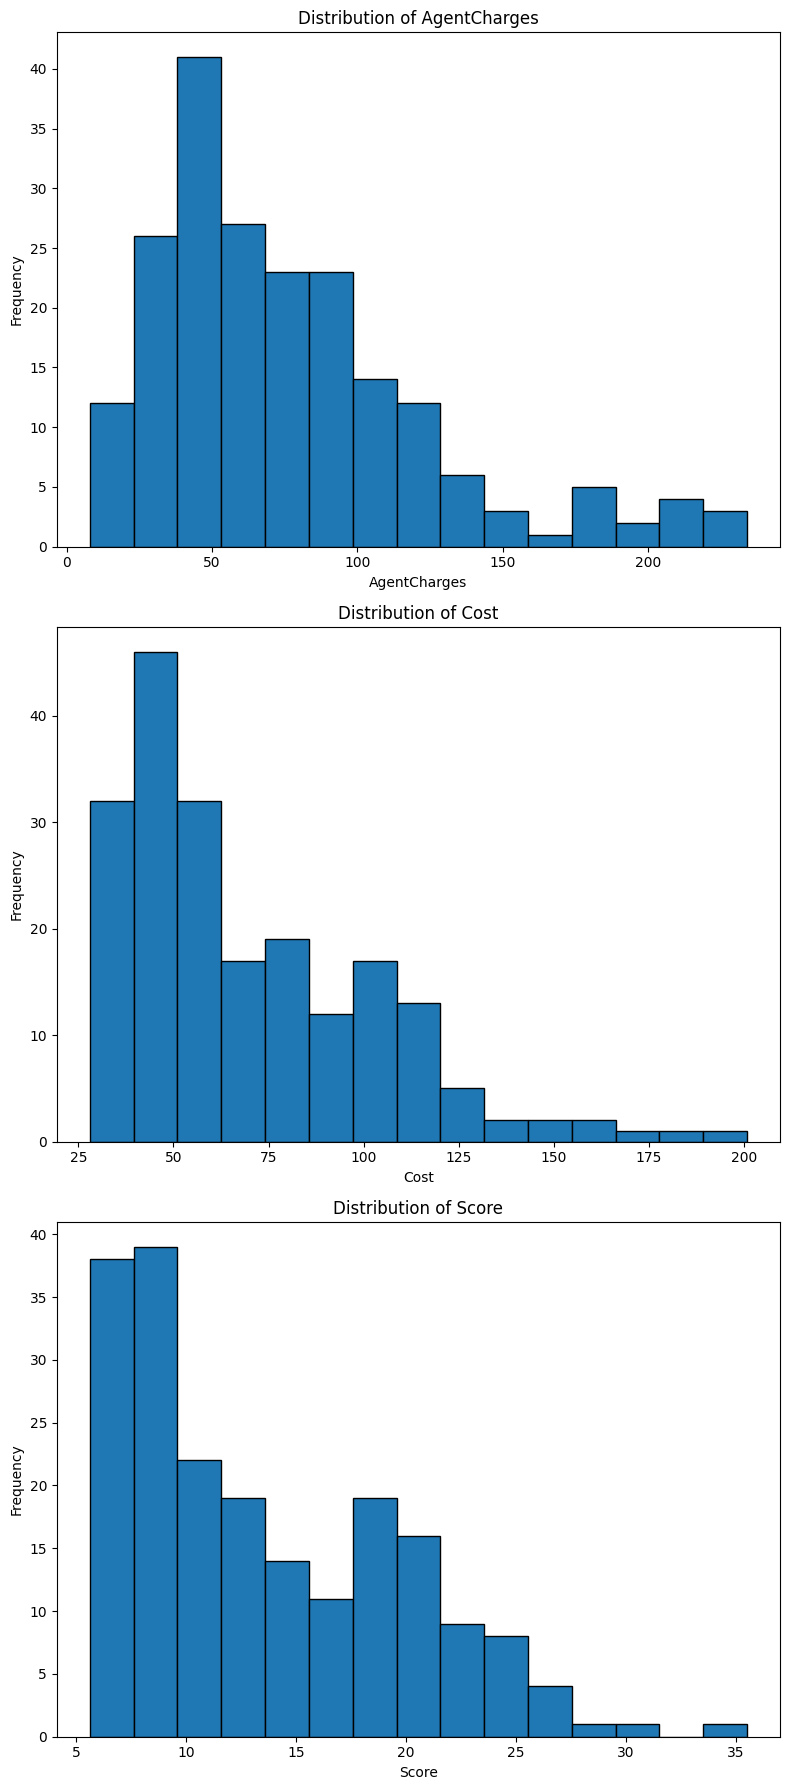

In [63]:
var_list =["AgentCharges","Cost","Score"]
fig, axs = plt.subplots(len(var_list), 1, figsize=(8, len(var_list)*6))

for i, var in enumerate(var_list):
    axs[i].hist(df[var], bins=15, edgecolor='black')
    axs[i].set_xlabel(var)
    axs[i].set_ylabel('Frequency')
    axs[i].set_title(f'Distribution of {var}')

plt.tight_layout()
plt.show()